## Directional Couplers

Directional couplers move light from one waveguide to another. This is done simply by bringing two waveguides parallel to each other for a certain distance at certain distance apart. The evanescent fields (fields existing outside of the waveguide) of one waveguide interact with another and thus power is transferred. This principle can be used to split or combine light, depending on the coupling length (the length at which the waveguides are sufficiently close to each other) and the phase of the light in the waveguides.

### Supermodes

Just like there are modes that exist in one waveguide, supermodes are modes that exist in multiple waveguides based on the interaction between them. These modes interact with each other and the combination of these interactions results in what light is propagating in the waveguide.

An "odd", or antisymmetric, supermode occurs when light in the two waveguides are $180\degree$ out of phase i.e. perfectly out of phase. Similarly, an "even", or symmetric, supermode occurs when the two waveguides are in phase.

The effective indices ($n_{eff,even}$, $n_{eff,odd}$) of the supermodes differs from that of the normal mode in the waveguide. $n_{eff,even}$ increases as the coupling gap decreases, and $n_{eff,odd}$ decreases as the coupling gap decreases.

### Coupling Coefficient

The coupling coefficient is $C = \frac{\pi\Delta n}{\lambda}$

Where $\Delta n = |n_{eff,even} - n_{eff,odd}|$

**NEED PICTURES FOR CLARITY. Also, more intuitive understanding of why the indices do what they do**

### Beating

As the supermodes propagate with different propagation constants, the field intensity oscillates between the two waveguides. This is called beating.

The propagation constants are:
$\beta _1 = \frac{2 \pi n_1}{\lambda}$ and
$\beta _2 = \frac{2 \pi n_2}{\lambda}$

The length it takes for one beat (for all of the power to go from one waveguide to the other) is called the cross-over length

### Cross-over Length
The power that one waveguide receives from the other is given by:

$$
P_{cross}(L) = P_{initial}sin^2(\frac{\pi\Delta n}{\lambda}L)
$$

and the coupling length, $L$, that gives 100% power transfer is $$L_{cross-over} = \frac {\lambda}{2\Delta n}$$

This is found from determining what length when multiplied by the propagation constants makes the phase difference $\pi$:

$$ \beta _1 L_x - \beta _2 L_x = \pi $$
$$ L_x[\frac{2 \pi n_1}{\lambda} - \frac{2 \pi n_2}{\lambda}] = \pi $$

**Have code that they can run that shows beating? in meep?**


     block, center = (0,0,0)
          size (12,4.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.1025,2.1025,2.1025)
     block, center = (0,0.35,0)
          size (12,0.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,-0.35,0)
          size (12,0.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000153065 s
Working in 2D dimensions.
Computational cell is 12 x 4.2 x 0 with resolution 20
     block, center = (0,0,0)
          size (12,4.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.1025,2.1025,2.1025)
     block, center = (0,0.35,0)
          size (12,0.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11

h5topng error: invalid colormap file
sh: 1: convert: not found


32512

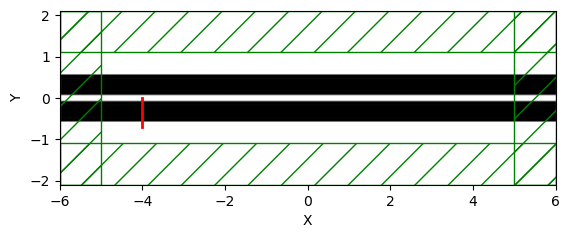

In [19]:
# Code to show beating/cross over length
import meep as mp


# Define materials
Si = mp.Medium(index=3.45)
SiO2 = mp.Medium(index=1.45)

# Define wavelength in um
wvl = 1.55
wg_width = 0.5

# # Define cell and geometric parameters
# Was going to calculate crossover length beforehand, but I think after might be easier
resolution = 20

gap = 0.2

dpml = 1
pad = 0.5
Lx = 10
Sx = dpml + Lx + dpml
Sy = dpml + pad + wg_width + gap + wg_width + pad + dpml
wg_center_y = gap/2 + wg_width/2

pml = [mp.PML(dpml)]

# Create 2 infinitely long parallel waveguides
geometry = [mp.Block(size=mp.Vector3(Sx,Sy, 0), center=mp.Vector3(), material=SiO2),
            mp.Block(size=mp.Vector3(Sx,wg_width, 0), center=mp.Vector3(0, wg_center_y, 0), material=Si),
            mp.Block(size=mp.Vector3(Sx,wg_width, 0), center=mp.Vector3(0, -wg_center_y, 0), material=Si),
            ]

# Put source at beginning of one waveguide
fcen = 1 / wvl
width = 0.2
fwidth = width * fcen
src=mp.GaussianSource(frequency=fcen, fwidth=fwidth)
source = [mp.EigenModeSource(src=src, eig_band=1,
        eig_kpoint = (1,0,0),
        size=mp.Vector3(0,gap+wg_width),
        center=mp.Vector3(-Sx/2+dpml+1, -wg_center_y))
        ]

# Simulate so source sends out a little pulse
sim = mp.Simulation(
    cell_size=mp.Vector3(Sx, Sy),
    boundary_layers=pml,
    geometry=geometry,
    sources=source,
    default_material=SiO2,
    resolution=resolution,
)

# Show simulation set-up
sim.plot2D()

# Capture electric field intensity over time and output into a gif
sim.run(mp.at_beginning(mp.output_epsilon),
        mp.to_appended("ez", mp.at_every(0.6, mp.output_efield_z)),
        until=200)




In [6]:
import os
os.system("h5topng -t 0:332 -R -Zc /home/ebang4/miniconda3/envs/h5utils/share/h5utils/colormaps/RdBu /home/ebang4/Github/Photonics-Bootcamp/book/pages/ez.h5")
os.system("convert ez.t*.png ez.gif")

sh: 1: convert: not found


32512

### Graphs to show the relationship that hopefully they have just observed in code

### Coupler-gap Dependence

How does the gap between the waveguides affect the coupling coefficient?

$$C = B\cdot e^{-A \cdot g}$$

$A$ and $B$ are dependent on 

##### Sources

"Silicon Photonics Design" by Lukas Chrostowski

"Photonic Components: Directional Coupler" by Stefan Preble (slides)

h5utils                   1.13.1          nompi_h51f32c1_1114    conda-forge
hdf5                      1.12.2          nompi_h4df4325_100    conda-forge